In [1]:
from erc.pre_data import Pre_data
from erc.PCA import PCA as pca


In [2]:
from sklearn.decomposition import PCA

In [3]:
import numpy as np
df=np.array(Pre_data(r'data/data_dolphin.csv'))
print(df)

[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 1 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 1 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [4]:
pca_dl=PCA()
pca_dl.fit(df)

PCA()

In [5]:
pca_dl.explained_variance_ratio_

array([1.36791084e-01, 9.12353273e-02, 7.89567734e-02, 5.82459242e-02,
       5.22599273e-02, 4.90574101e-02, 4.52775053e-02, 3.83014737e-02,
       3.40076474e-02, 3.04436655e-02, 2.87997395e-02, 2.50413647e-02,
       2.32402581e-02, 2.21477460e-02, 2.13826537e-02, 2.03106395e-02,
       1.77510945e-02, 1.67963561e-02, 1.61539177e-02, 1.48641565e-02,
       1.34540884e-02, 1.16570023e-02, 1.06116469e-02, 1.04169813e-02,
       9.43374570e-03, 9.07273355e-03, 8.68870850e-03, 8.05722978e-03,
       7.82074359e-03, 7.82074359e-03, 7.77263246e-03, 6.70888956e-03,
       6.48961195e-03, 6.07608843e-03, 5.82813960e-03, 5.54274519e-03,
       5.04147136e-03, 4.72277405e-03, 4.03033545e-03, 3.87444445e-03,
       3.39032981e-03, 3.05922249e-03, 2.83541560e-03, 2.75824803e-03,
       2.10245043e-03, 1.94416477e-03, 1.89878668e-03, 1.49771592e-03,
       1.29541564e-03, 9.85329676e-04, 9.21070905e-04, 7.30395593e-04,
       6.93921579e-04, 4.75182101e-04, 3.95110462e-04, 2.78289603e-04,
      

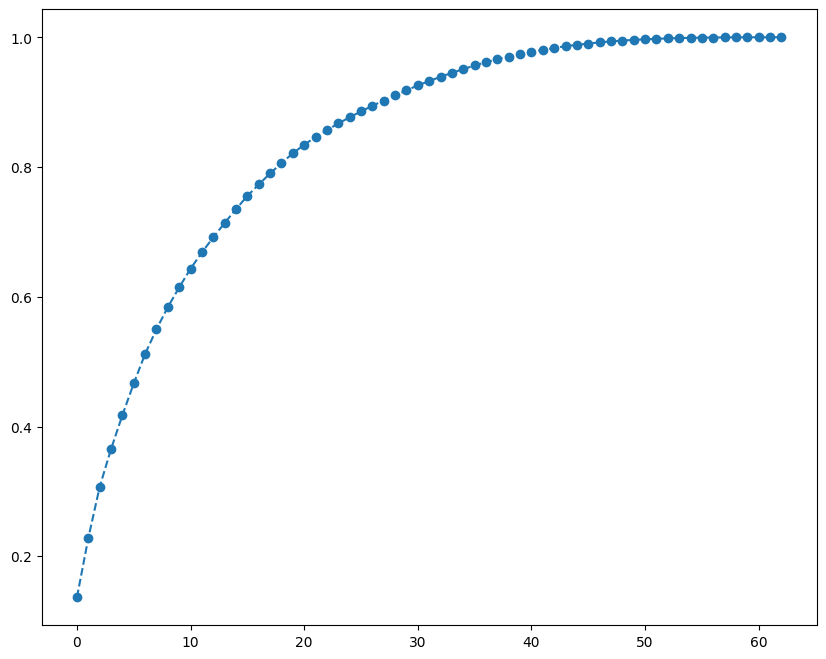

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(pca_dl.explained_variance_ratio_.cumsum(),marker='o',linestyle = '--')


A rule of thumb is to preserve around 80 % of the variance so we take 18-22

In [6]:
pca_mdl = pca(df, num_bases=18)
pca_mdl.factorize()

In [7]:
import numpy as np
np.round(-1*pca_mdl.W,2)

array([[ 0.07, -0.06,  0.17, ...,  0.11, -0.02,  0.02],
       [-0.15, -0.02,  0.07, ...,  0.09, -0.05,  0.05],
       [ 0.01, -0.03,  0.16, ..., -0.1 ,  0.03,  0.06],
       ...,
       [-0.02,  0.  ,  0.  , ..., -0.05,  0.03, -0.05],
       [ 0.03, -0.05,  0.01, ...,  0.25,  0.03,  0.1 ],
       [-0.01,  0.  ,  0.01, ..., -0.01, -0.02, -0.09]])

In [9]:
res=np.round(np.dot((-1*pca_mdl.W),(-1*pca_mdl.W.T)),2)
res

array([[ 0.3 , -0.  ,  0.02, ..., -0.02, -0.04, -0.02],
       [-0.  ,  0.34, -0.02, ..., -0.02, -0.02, -0.03],
       [ 0.02, -0.02,  0.37, ..., -0.03,  0.23, -0.01],
       ...,
       [-0.02, -0.02, -0.03, ...,  0.24, -0.01,  0.01],
       [-0.04, -0.02,  0.23, ..., -0.01,  0.36, -0.02],
       [-0.02, -0.03, -0.01, ...,  0.01, -0.02,  0.01]])

In [10]:
res.shape

(63, 63)

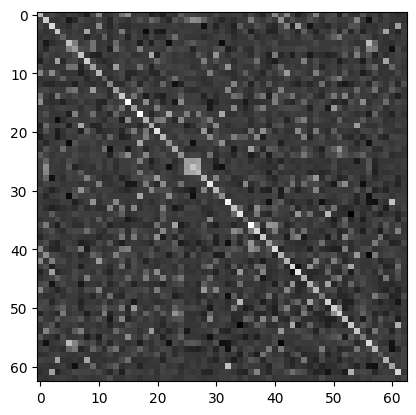

In [12]:
import matplotlib.pyplot as plt
im=res
plt.gray()
plt.imshow(im)